# Group Comparisons ---
We will learn how to make intelligent comparisons between groups (using business case scenarios) <br>
In the beginning, we will start small by observing one group alone and performing descriptive statistics, draw plots that capture its essence. Moving, we can reason between the sample with two groups and conlude with two statistical significance tests: the t-test and Mann-Whitney U-test.

### About Data --
This data records measurements of 1,034 professional basketball players, including their height, weight and age at the time of measurement.<br>
<b>The collective 1034 people are called population, which in the world of statistics means any set of similar itmes that are being studied to answer a particular question.</b>

In [2]:
import pandas as pd
df = pd.read_csv('mlb.csv')
print(df.head())
print(df.tail())
print(df.shape) #One row for each person recorded and one column for each fact measured about the person.

              name team       position  height  weight    age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71
                name team        position  height  weight    age
1029   Brad_Thompson  STL  Relief_Pitcher      73   190.0  25.08
1030   Tyler_Johnson  STL  Relief_Pitcher      74   180.0  25.73
1031  Chris_Narveson  STL  Relief_Pitcher      75   205.0  25.19
1032   Randy_Keisler  STL  Relief_Pitcher      75   190.0  31.01
1033     Josh_Kinney  STL  Relief_Pitcher      73   195.0  27.92
(1034, 6)


In [3]:
# Doing exploratory analysis everytime we get a new data set is useful. .describe()
print(df.describe())

            height       weight          age
count  1034.000000  1033.000000  1034.000000
mean     73.697292   201.689255    28.736712
std       2.305818    20.991491     4.320310
min      67.000000   150.000000    20.900000
25%      72.000000   187.000000    25.440000
50%      74.000000   200.000000    27.925000
75%      75.000000   215.000000    31.232500
max      83.000000   290.000000    48.520000


In [4]:
df.loc[df['weight'].isna(), :]

,name,team,position,height,weight,age
640,Kirk_Saarloos,CIN,Starting_Pitcher,72,NaN,27.77


## Summary Statistics -
Plotting the data early and often is also a good idea in any data-analysis effort. We'll create a boxplot with the following code.

([<matplotlib.axis.XTick at 0x2294fb43380>], [Text(1, 0, 'Full Population')])

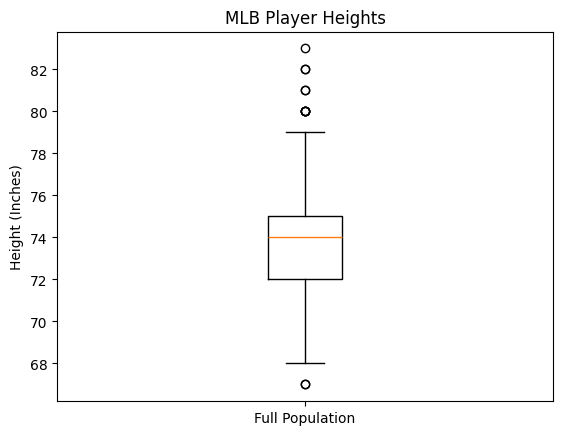

In [5]:
# Plotting data early is often a good idea in any data-analysis effort. We'll create a boxplot
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.boxplot([df['height']])
ax1.set_ylabel("Height (Inches)")
plt.title("MLB Player Heights")
plt.xticks([1], ['Full Population'])

<Axes: ylabel='height'>

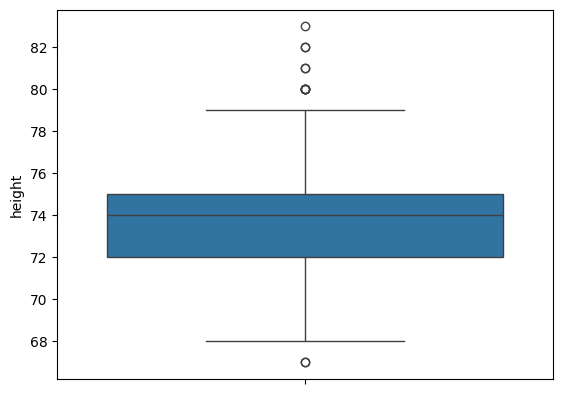

In [6]:
import seaborn as sns
sns.boxplot(data = df, y = df['height']) #Comeback to it later

# Random Samples 
## Data Sampling

So in an instance when we want to study a population, but we do not have the access to the whole population. We study a small part of it or <i>sample</i> instead. <br>
<b>For Example</b>: Medical Researchers may want to create a drug that can cure a disease for all women over 50 years old. Researchers may not have a way to contact every 50 Year old women in the world, so instead they recruit a sample of that full population, maybe a few 100 people and study the effect of their drug on this sample. <br>
The <b>hope</b> is that the sample resembles the full population, inferring the same affects on the whole population. <br>
Recruiting a sample is a delicate task and must be done carefully, In an instance where all participants are at an Olympic Training facility, the sample will contain people who are healthier than average, resulting in a drug that may work for healthy people but not for everyone.<br>
<i>The best way to collect a sample that resembles the full population is to take random sample.

### Pandas.DataFrame.sample
Return a random sample of items from an axis of object. <br>
n = int [ Number of items from axis to return ] <br>
<b><i>NOTE:</i></b> In the world of statistics, choosing <i>n = 30</i> is a common convention. When we choose samples that have <b>atleast size 30</b>.

In [8]:
sample1 = df.sample(n = 30, random_state = 8675309)
sample2= df.sample(n =  30, random_state = 1729)
# Manual sample -  
sample3 = [71, 72, 73, 74, 74, 76, 75, 75, 75, 76, 75, 77, 76, 75, 77, 76, 75, 76, 76, 75, 75, 81, 77, 75, 77, 75, 77, 77, 75, 75]

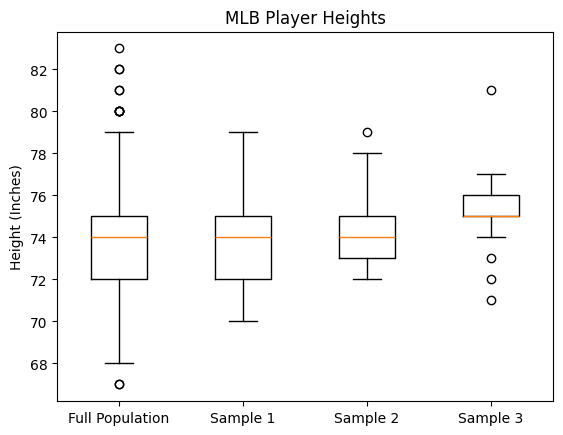

In [11]:
import numpy as np
fig1, ax1 = plt.subplots()
ax1.boxplot([df['height'], sample1['height'], sample2['height'], np.array(sample3)])
ax1.set_ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1,2,3,4], ['Full Population', 'Sample 1', 'Sample 2', 'Sample 3'])
plt.show()


<b>Note</b>: When we take large enough random samples from a population, the samples should resemble the population.

In [12]:
print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(sample3))
#Mean of whole population: 73.7

73.8
74.36666666666666
75.43333333333334


The means are relatively close to the mean height of full population. In this context, height of the full population has a special name; its called population's <i>expected value</i>. <br>
We expect that the mean height of our sample will be about the same as the population's expected value for height, 73.7. The mean of our two random samples indeed come close to our expected value. When we look at the boxplot of Sample 3, we can clearly see that it doesn't resemble to the other three box plots as much they resemble each other. But on the other hand it doesn't look very different from the population or other samples that we can immediately certain that it isn't a random sample from our population. We need to learn more before we can feel certain about whether sample3 is a random draw from our population or whether it comes from some other population. <br>
The vague and impressionistic language to talk about samples: <i>they resemble each other</i> or that their means are <i>relatively close</i>. <br>
But if we really want to make concrete-evidence based decisions, we need precision. <br>
Exploring quantitative statistical methods that have been developed for reasoning about the differences between groups, including some tests that help us decide whether two groups come from the same population.

# Differences Between Sample Data --
How big of a difference between sample means would make it implausible that two samples come from the same population? <br>
To understand this we must understand the <b><i>size differences</i></b> we should expect between random samples from our population. Right now we have looked at only <b>two random samples</b> from our population. Instead of trying to generalize based on only two samples, lets look at a large collection of samples and see how much they tend to differ from one another. <br>
This will help us understand which variations are plausible and which variations are implausible. <br>
2,000 sample means and their differences --

In [13]:
alldifferences = []
for i in range(1000):
    newsample1 = df.sample(n= 30, random_state= i*2)
    newsample2 = df.sample(n= 30, random_state= i*2+1)
    alldifferences.append(newsample1['height'].mean() - newsample2['height'].mean())

print(alldifferences[0:10])

[np.float64(0.8333333333333286), np.float64(-0.30000000000001137), np.float64(-0.10000000000000853), np.float64(-0.1666666666666572), np.float64(0.06666666666667709), np.float64(-0.9666666666666686), np.float64(0.7999999999999972), np.float64(0.9333333333333371), np.float64(-0.5333333333333314), np.float64(-0.20000000000000284)]
